<a href="https://colab.research.google.com/github/MaryemSamet/-Data-Mining-Machine-Learning-/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
import pandas as pd
import io
data = pd.read_csv('dataset_test (1).csv')


In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scipy.stats as spstats
%matplotlib inline


In [83]:
''' First step is to extract some usefull features '''


#work in a copy
df = data.copy()

#to get number of followed newsletter by each USER id 
df1 = df.groupby('id').count()
df1 =df1.rename(columns={'nl_email':'nb_followings'})
del df1['gender']


#to get number of followings for each NEWSLETTER id
df2 = df.groupby('nl_email').count()  
df2 =df2.rename(columns={'id':'nb_followers'})
del df2['gender']

#to get number of females that are following each NEWSLETTER 
df_female = df[df['gender'] == 'female']
df3 = df_female.groupby('nl_email').count() 
df3 = df3.rename(columns={'id':'nl_female_count'})
del df3['gender']


#to get number of males that are following each NEWSLETTER 
df_male = df[df['gender'] == 'male']
df4 = df_male.groupby('nl_email').count()
df4 = df4.rename(columns={'id':'nl_male_count'})
del df4['gender']


#concatenate df3 and df4 and put it in df5
df5 = pd.concat([df3, df4], axis=1, sort=False)
df5 = df5.fillna(0)

#get the pourcentage of female followers for each NEWSLETTER
df5['nl_female_pourcentage']= df5['nl_female_count'] / (df5['nl_female_count']+df5['nl_male_count'])
#get the pourcentage of male followers for each NEWSLETTER
df5['nl_male_pourcentage']= df5['nl_male_count'] / (df5['nl_female_count']+df5['nl_male_count'])


#merge all new features with the original df 
df = df.merge(df1, on='id')
df = df.merge(df2, on='nl_email')
df = df.merge(df5,on='nl_email')
df 

,nl_email,id,gender,nb_followings,nb_followers,nl_female_count,nl_male_count,nl_female_pourcentage,nl_male_pourcentage
0,0,63150,male,36,5,0.0,5.0,0.000000,1.000000
1,0,177765,male,137,5,0.0,5.0,0.000000,1.000000
2,0,289118,male,180,5,0.0,5.0,0.000000,1.000000
3,0,306212,male,590,5,0.0,5.0,0.000000,1.000000
4,0,822940,male,7,5,0.0,5.0,0.000000,1.000000
5,62788,63150,male,36,2,1.0,1.0,0.500000,0.500000
6,62788,591052,female,301,2,1.0,1.0,0.500000,0.500000
7,89982,63150,male,36,3190,2462.0,728.0,0.771787,0.228213
8,89982,44429,female,636,3190,2462.0,728.0,0.771787,0.228213
9,89982,339463,female,966,3190,2462.0,728.0,0.771787,0.228213


In [84]:
#get unique newsletter id and there corresponding feature
df_unique_nl= df.drop_duplicates('nl_email')
del df_unique_nl['gender']
del df_unique_nl['id']

df_unique_nl


,nl_email,nb_followings,nb_followers,nl_female_count,nl_male_count,nl_female_pourcentage,nl_male_pourcentage
0,0,36,5,0.0,5.0,0.000000,1.000000
5,62788,36,2,1.0,1.0,0.500000,0.500000
7,89982,36,3190,2462.0,728.0,0.771787,0.228213
3197,159185,36,22,11.0,11.0,0.500000,0.500000
3219,176642,36,58601,22825.0,35776.0,0.389498,0.610502
61820,178646,36,3436,1131.0,2305.0,0.329162,0.670838
65256,29073,36,213,137.0,76.0,0.643192,0.356808
65469,235088,36,6,3.0,3.0,0.500000,0.500000
65475,237356,36,1965,1210.0,755.0,0.615776,0.384224
67440,251901,36,16,8.0,8.0,0.500000,0.500000


In [0]:
#drop id user id and email id to avoid overfitting and because they givn't any important information 
df_copy = df.copy()
del df['nl_email']
del df['id']

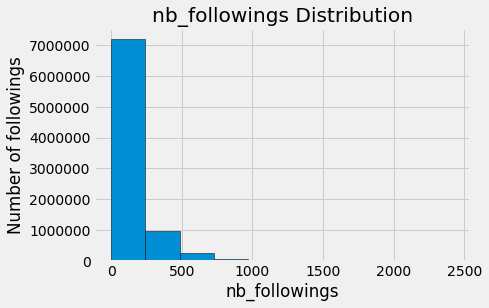

In [86]:
''' Second step is to do some Exploratory Data Analysis '''

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['nb_followings'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('nb_followings'); plt.ylabel('Number of followings'); 
plt.title('nb_followings Distribution');



#that means that the mojority of users (75%) are following less than 200 newsletters 


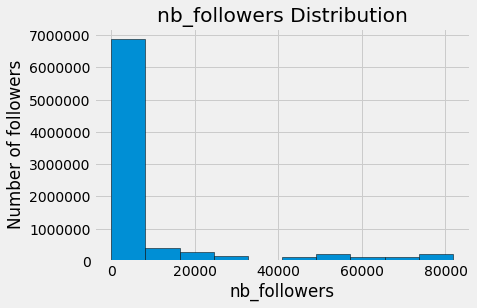

In [87]:
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['nb_followers'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('nb_followers'); plt.ylabel('Number of followers'); 
plt.title('nb_followers Distribution');


#that means that the majority of newsletters have less than 500 followers 

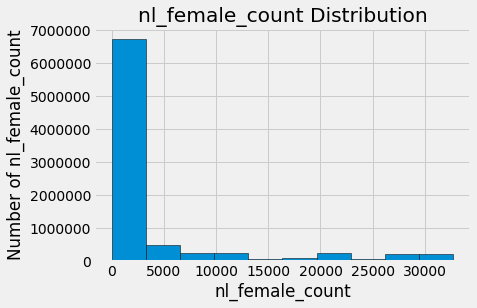

In [88]:
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['nl_female_count'].dropna(), bins = 10, edgecolor = 'k');
plt.xlabel('nl_female_count'); plt.ylabel('Number of nl_female_count'); 
plt.title('nl_female_count Distribution');

#the majority of newsletter are followed by less than 2215 females     

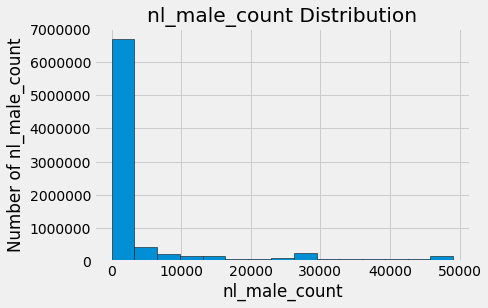

In [89]:
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['nl_male_count'].dropna(), bins = 15, edgecolor = 'k');
plt.xlabel('nl_male_count'); plt.ylabel('Number of nl_male_count'); 
plt.title('nl_male_count Distribution');

#the majority of newsletter are followed by less than 2418 males     


In [0]:
cat_cols = ['gender']

num_cols = ['nb_followings', 'nb_followers',
            'nl_female_count', 'nl_male_count', 'nl_female_pourcentage','nl_male_pourcentage']


Text(0.5, 1.0, 'Bar plot for gender')

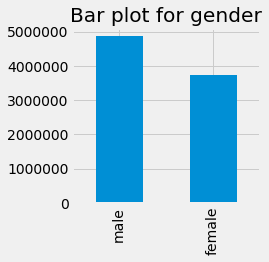

In [91]:
fig = plt.figure(figsize=(3,3)) # define plot area
ax = fig.gca() # define axis  
counts = df['gender'].value_counts() # find the counts for each unique category
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Bar plot for gender')
    
#that means that the amount of male followers are more than the female followers

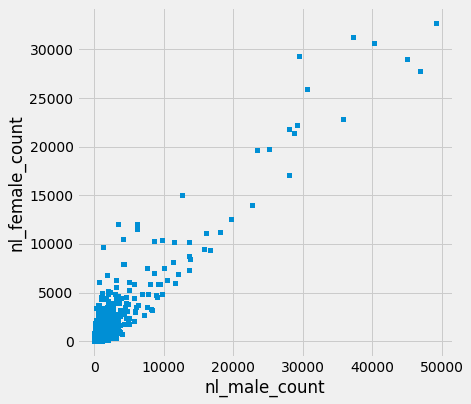

In [92]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis  
df.plot.scatter(x = 'nl_male_count', y = 'nl_female_count', ax = ax)


#we can see that amount of female followers and male followers is  big or small relatively to there total number.
#we will need to have groups that shows us the the amount of female/male followers 

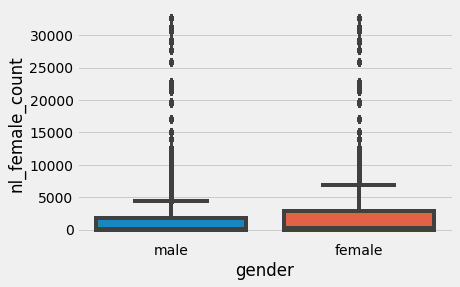

In [93]:
sns.boxplot('gender', 'nl_female_count', data=df)
plt.xlabel('gender') # Set text for the x axis
plt.ylabel('nl_female_count')# Set text for y axis
plt.show()

#that means that newsletter 

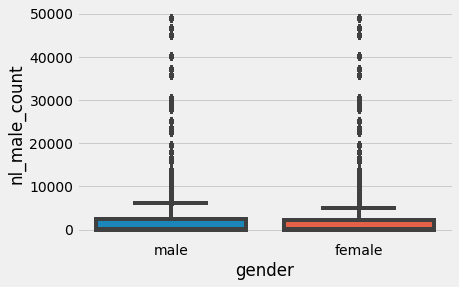

In [94]:
sns.boxplot('gender', 'nl_male_count', data=df)
plt.xlabel('gender') # Set text for the x axis
plt.ylabel('nl_male_count')# Set text for y axis
plt.show()

#that means that if the number of male followers less than 2418 we've got male 
#if the total male followers less than 

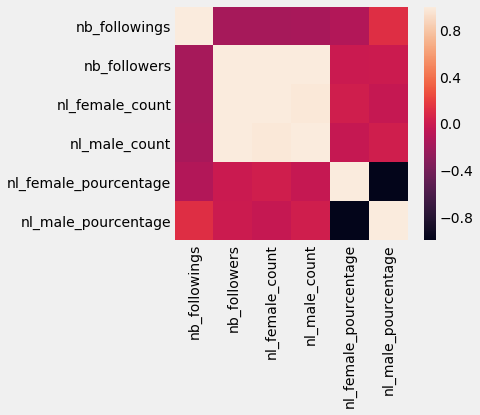

In [95]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = df.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)


Text(0, 0.5, 'Frequency')

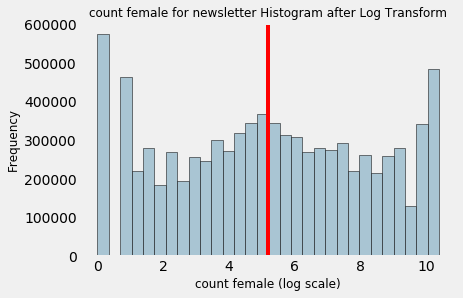

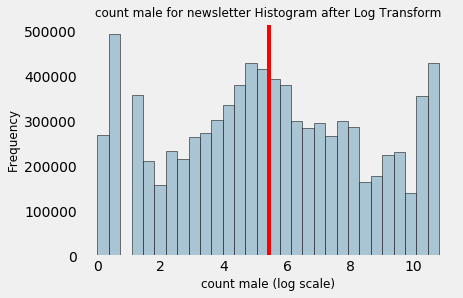

In [96]:
#Mathematical Transformations
#Log transform

df['count_female_log'] = np.log((1+ df['nl_female_count'])) 

count_female_log_mean = np.round(np.mean(df['count_female_log']), 2)
fig, ax = plt.subplots()
df['count_female_log'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(count_female_log_mean, color='r')
ax.set_title('count female for newsletter Histogram after Log Transform', 
             fontsize=12)
ax.set_xlabel('count female (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


df['count_male_log'] = np.log((1+ df['nl_male_count'])) 
count_male_log_mean = np.round(np.mean(df['count_male_log']), 2)
fig, ax = plt.subplots()
df['count_male_log'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(count_male_log_mean, color='r')
ax.set_title('count male for newsletter Histogram after Log Transform', 
             fontsize=12)
ax.set_xlabel('count male (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [97]:
#binarization
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=0.9)
nl_female = bn.transform([df['nl_female_count']])[0]
df['nl_female'] = nl_female

nl_male = bn.transform([df['nl_male_count']])[0]
df['nl_male'] = nl_male
df

,gender,nb_followings,nb_followers,nl_female_count,nl_male_count,nl_female_pourcentage,nl_male_pourcentage,count_female_log,count_male_log,nl_female,nl_male
0,male,36,5,0.0,5.0,0.000000,1.000000,0.000000,1.791759,0.0,1.0
1,male,137,5,0.0,5.0,0.000000,1.000000,0.000000,1.791759,0.0,1.0
2,male,180,5,0.0,5.0,0.000000,1.000000,0.000000,1.791759,0.0,1.0
3,male,590,5,0.0,5.0,0.000000,1.000000,0.000000,1.791759,0.0,1.0
4,male,7,5,0.0,5.0,0.000000,1.000000,0.000000,1.791759,0.0,1.0
5,male,36,2,1.0,1.0,0.500000,0.500000,0.693147,0.693147,1.0,1.0
6,female,301,2,1.0,1.0,0.500000,0.500000,0.693147,0.693147,1.0,1.0
7,male,36,3190,2462.0,728.0,0.771787,0.228213,7.809135,6.591674,1.0,1.0
8,female,636,3190,2462.0,728.0,0.771787,0.228213,7.809135,6.591674,1.0,1.0
9,female,966,3190,2462.0,728.0,0.771787,0.228213,7.809135,6.591674,1.0,1.0


Text(0, 0.5, 'Frequency')

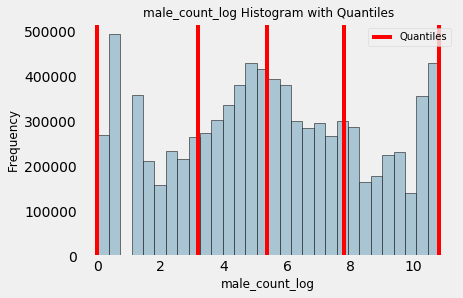

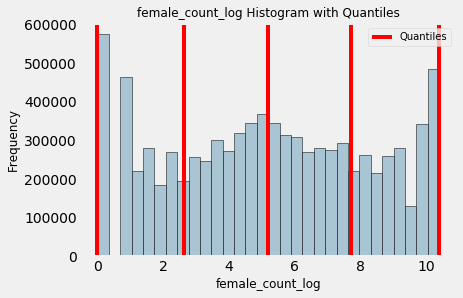

In [98]:
''' Third step is to do Feature engineering '''

#Adaptive Binning  for nl_male_count

quantile_list = [0, .25, .5, .75, 1.]
quantiles_male_log = df['count_male_log'].quantile(quantile_list)
quantiles_male_log

#binning 
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df['nl_male_count_quantile_range'] = pd.qcut(
                                            df['count_male_log'], 
                                            q=quantile_list)
df['nl_male_count_quantile_label_log'] = pd.qcut(
                                            df['count_male_log'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

fig, ax = plt.subplots()
df['count_male_log'].hist(bins=30,color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles_male_log:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('male_count_log Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('male_count_log', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


#Adaptive Binning  for nl_female_count


quantile_list = [0, .25, .5, .75, 1.]
quantiles_female_log = df['count_female_log'].quantile(quantile_list)
quantiles_female_log

#binning 
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
df['nl_female_count_quantile_range'] = pd.qcut(
                                            df['count_female_log'], 
                                            q=quantile_list)
df['nl_female_count_quantile_label_log'] = pd.qcut(
                                            df['count_female_log'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

fig, ax = plt.subplots()
df['count_female_log'].hist(bins=30,color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles_female_log:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('female_count_log Histogram with Quantiles', 
             fontsize=12)
ax.set_xlabel('female_count_log', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


In [0]:
#rouding 

df['nl_female_pourcentage_scaled_100'] = np.array(
                  np.round((df['nl_female_pourcentage'] * 100)),    
                  dtype='int')
df['nl_male_pourcentage_scaled_100'] = np.array(
                   np.round((df['nl_male_pourcentage'] * 100)),  
                   dtype='int')

In [100]:
dataframe = df[['nl_female_count_quantile_label_log', 'nl_male_count_quantile_label_log','nl_female','nl_male' 
               ,'nl_female_pourcentage_scaled_100','nl_male_pourcentage_scaled_100','gender']]
dataframe

,nl_female_count_quantile_label_log,nl_male_count_quantile_label_log,nl_female,nl_male,nl_female_pourcentage_scaled_100,nl_male_pourcentage_scaled_100,gender
0,0-25Q,0-25Q,0.0,1.0,0,100,male
1,0-25Q,0-25Q,0.0,1.0,0,100,male
2,0-25Q,0-25Q,0.0,1.0,0,100,male
3,0-25Q,0-25Q,0.0,1.0,0,100,male
4,0-25Q,0-25Q,0.0,1.0,0,100,male
5,0-25Q,0-25Q,1.0,1.0,50,50,male
6,0-25Q,0-25Q,1.0,1.0,50,50,female
7,75-100Q,50-75Q,1.0,1.0,77,23,male
8,75-100Q,50-75Q,1.0,1.0,77,23,female
9,75-100Q,50-75Q,1.0,1.0,77,23,female


In [101]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
 
gle = LabelEncoder()
gender_labels = gle.fit_transform(dataframe['gender'])
gender_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
dataframe['gender'] = gender_labels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [102]:
# transform and map nl_female_count_quantile_label_log
fem_le = LabelEncoder()
fem_labels = fem_le.fit_transform(dataframe['nl_female_count_quantile_label_log'])
dataframe['female_count_Label'] = fem_labels
# transform and map nl_male_count_quantile_label_log
male_le = LabelEncoder()
male_labels = male_le.fit_transform(dataframe['nl_male_count_quantile_label_log'])
dataframe['male_count_Label'] = male_labels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [103]:

#we can use One hot encoder with our nominal categorical features since the unique categories are small 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# encode gender  labels using one-hot encoding scheme
'''gender_ohe = OneHotEncoder()
gender_feature_arr = gender_ohe.fit_transform(
                                dataframe[['gender']]).toarray()
gender_feature_labels = ['gender'+str(cls_label) 
                           for cls_label in gle.classes_]
gender_features = pd.DataFrame(gender_feature_arr, 
                            columns=gender_feature_labels)'''



male_ohe = OneHotEncoder()
nl_male_count_feature_arr = male_ohe.fit_transform(
                                dataframe[['male_count_Label']]).toarray()
nl_male_count_feature_labels = ['male_count_Label'+str(cls_label) 
                           for cls_label in male_le.classes_]
nl_male_count_features = pd.DataFrame(nl_male_count_feature_arr, 
                            columns=nl_male_count_feature_labels)

female_ohe = OneHotEncoder()
nl_female_count_feature_arr = female_ohe.fit_transform(
                                dataframe[['female_count_Label']]).toarray()
nl_female_count_feature_labels = ['female_count_Label'+str(cls_label) 
                           for cls_label in fem_le.classes_]
nl_female_count_features = pd.DataFrame(nl_female_count_feature_arr, 
                            columns=nl_female_count_feature_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [104]:
df_feautures = dataframe[['gender','nl_female','nl_male' 
               ,'nl_female_pourcentage_scaled_100','nl_male_pourcentage_scaled_100']]
dataframe_encoded = pd.concat([df_feautures,nl_male_count_features ,nl_female_count_features], axis=1)
dataframe_encoded

,gender,nl_female,nl_male,nl_female_pourcentage_scaled_100,nl_male_pourcentage_scaled_100,male_count_Label0-25Q,male_count_Label25-50Q,male_count_Label50-75Q,male_count_Label75-100Q,female_count_Label0-25Q,female_count_Label25-50Q,female_count_Label50-75Q,female_count_Label75-100Q
0,1,0.0,1.0,0,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,0.0,1.0,0,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0.0,1.0,0,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,1.0,0,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,1.0,0,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1,1.0,1.0,50,50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0,1.0,1.0,50,50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1,1.0,1.0,77,23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,0,1.0,1.0,77,23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0,1.0,1.0,77,23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [0]:
#we one hot encoded the TARGET LABEL (gender) because  the scikit-learn's Random Forest can't predict text — it can only predict numbers
#we are going to use multi class classification approach


#save the target value to a new variable
#copied_dataframe_encoded = dataframe_encoded.copy()
#y_target= pd.DataFrame(copied_dataframe_encoded["gender"])
#y = dataframe_encoded[dataframe_encoded.columns[-2:]]
#y_target= pd.concat([pd.DataFrame(dataframe_encoded['gendermale']),pd.DataFrame(dataframe_encoded['genderfemale'])], axis=1)


#save the target value to a new variable
y_target = dataframe_encoded[dataframe_encoded.columns[:1]]
dataframe_encoded.drop(['gender'], axis=1, inplace=True)


In [106]:
'''SPLIT OUR DATA INTO TRAIN AND TEST SETS'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe_encoded, y_target, test_size = 0.3)

print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)


Training data is (6009173, 12)
Training target is (6009173, 1)
test data is (2575361, 12)
test target is (2575361, 1)


In [107]:
'''PERFORM FEATURE NORMALIZATION/ SCALING'''

#Scaling refers to the general process of changing the range of a feature. This is necessary because features are measured in different units, and therefore cover different ranges. Methods such as support vector machines and K-nearest neighbors that take into account distance measures between observations are significantly affected by the range of the features and scaling allows them to learn.
#In this step, we perform normalization/standardization. It is process of re-scaling our data, so that the variations present in our data will not affect the accuracy of model.
from sklearn.preprocessing import RobustScaler, StandardScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data


array([[-1.  ,  0.  , -1.68,  1.68,  1.  ],
       [ 0.  ,  0.  , -1.32,  1.32,  0.  ],
       [ 0.  ,  0.  ,  0.48, -0.48,  0.  ],
       [ 0.  ,  0.  , -0.16,  0.16,  0.  ],
       [ 0.  ,  0.  , -0.12,  0.12,  0.  ]])

In [0]:
#Modelling in machine learning is an iterative phase where a data scientist continually train and test
#machine learning models to discover the best and high performing one for the give task.

In [0]:
'''Model selection'''
'''#we have two mututally exclusive classes so we are in multi class classification type , so we are going to use the technique of "oneVsall" of sklearn

import sklearn.neighbors
import sklearn.multiclass
 
estimator =sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
 
estimator = sklearn.multiclass.OneVsRestClassifier(estimator, n_jobs=1)
estimator.fit(X_train, y_train)
'''

In [0]:
#There is a elegant way to combine above three steps using sci-kit learn’s Pipeline. Pipeline applies a list of transformations before the final model.

# Data pre-processing, Feature selection and Model selection.

# Imports for pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

# Create pipeline
pipeline = make_pipeline(\
                         RobustScaler(),
                         SelectKBest(f_classif),
                         LogisticRegression(solver='lbfgs'))


In [111]:
pipeline

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('selectkbest',
                 SelectKBest(k=10,
                             score_func=<function f_classif at 0x7fa60cd36400>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# Model validation
from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [1, 2, 3, 4],
    'logisticregression__class_weight': [None,'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0, 10.0, 100.00, 1000.0, 10000.0]
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5,
                         scoring='accuracy', verbose=1)

gridsearch.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d ar

In [45]:
X_train

array([[ 0.     ,  0.     , -0.03125, ...,  0.     ,  0.     ,  1.     ],
       [ 0.     ,  0.     ,  0.21875, ...,  0.     ,  0.     ,  1.     ],
       [ 0.     ,  0.     , -0.28125, ...,  1.     ,  0.     ,  0.     ],
       ...,
       [ 0.     ,  0.     ,  0.375  , ...,  0.     ,  0.     ,  1.     ],
       [ 0.     ,  0.     , -0.5    , ...,  1.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.3125 , ...,  0.     ,  0.     ,  0.     ]])

In [46]:
# Interpret the results.

# Best cross validation score
print('Cross Validation Score:', gridsearch.best_score_)

# Best parameters which resulted in the best score
print('Best Parameters:', gridsearch.best_params_)

# Which features were selected?
selector = gridsearch.best_estimator_.named_steps['selectkbest']
all_names = dataframe_encoded.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print()
print('Features not selected:')
for name in unselected_names:
    print(name)


Cross Validation Score: 0.7719840909765477
Best Parameters: {'logisticregression__C': 0.0001, 'logisticregression__class_weight': None, 'selectkbest__k': 1}
Features selected:
nl_female_pourcentage_scaled_100

Features not selected:
nl_female
nl_male
nl_male_pourcentage_scaled_100
male_count_Label0-25Q
male_count_Label25-50Q
male_count_Label50-75Q
male_count_Label75-100Q
female_count_Label0-25Q
female_count_Label25-50Q
female_count_Label50-75Q
female_count_Label75-100Q


In [48]:
#Get the best model and check it against test data set.
from sklearn.metrics import accuracy_score

# Predict with X_test features
y_pred = gridsearch.predict(X_test)

# Compare predictions to y_test labels
test_score = accuracy_score(y_test, y_pred)
print('Accuracy Score on test data set:', test_score)


Accuracy Score on test data set: 0.7727751669552313


In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score


# def get_mae(pred, target):
#     return mean_absolute_error(true, pred)

def cross_validate(model, nfolds, feats, targets):
    score = -1 * (cross_val_score(model, feats, targets, cv=nfolds, scoring='neg_mean_absolute_error'))
    return np.mean(score)


In [50]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()
print("MAE Sccore: ", cross_validate(lr_model, 10, X_train, y_train))


MAE Sccore:  0.29658486699697784


In [51]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2, random_state=2)
print("MAE Sccore: ", cross_validate(dt_model, 10, X_train, y_train))


MAE Sccore:  0.2963555979456963


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

# Train our classifier
model = gnb.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:

# Make predictions
preds = gnb.predict(X_test)
print(preds)


# Evaluate accuracy
print(accuracy_score(y_test, preds))


[1 0 0 ... 0 0 1]
0.7666608953747217


In [0]:


Index_label = df.query('nl_email == 0').index.tolist() 
  
# Print all the labels 
print(Index_label[0])
newsletter = dataframe_encoded.loc[ Index_label[0] , : ]


newsletter = [[newsletter['nl_female'], newsletter['nl_male'],newsletter['nl_female_pourcentage_scaled_100'],newsletter['nl_male_pourcentage_scaled_100'],newsletter['male_count_Label0-25Q'],newsletter['male_count_Label25-50Q'],newsletter['ale_count_Label50-75Q'],newsletter['ale_count_Label75-100Q'],newsletter['female_count_Label0-25Q'],newsletter['female_count_Label25-50Q'],newsletter['female_count_Label50-75Q'],newsletter['female_count_Label75-100Q']] 
                           
                       
new_df




array([-1.    ,  0.    , -0.9375,  0.9375,  1.    ,  0.    ,  0.    ,
        0.    ,  1.    ,  0.    ,  0.    ,  0.    ])